In [2]:
import tensorflow as tf
import numpy as np
import os
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', size=16) 
from sklearn.preprocessing import MinMaxScaler
import warnings
import logging
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from tensorflow.keras import regularizers
tfk = tf.keras
tfkl = tf.keras.layers
print(tf.__version__)
import math
seed=42
import tensorflow as tf

!pip install pyDOE

2023-09-13 18:46:35.803167: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-09-13 18:46:35.804640: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-13 18:46:35.840614: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-13 18:46:35.841015: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-13 18:46:36.644174: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

2.13.0


In [3]:
#you need to add a dataset with GaussJacobiQuadRule_V3 on the right 
import sys
# sys.path.insert(1, '/kaggle/input/quadrule')
from GaussJacobiQuadRule_V3 import Jacobi, DJacobi, GaussLobattoJacobiWeights, GaussJacobiWeights

import pyDOE

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from pyDOE import lhs
#from GaussJacobiQuadRule_V3.py import Jacobi, DJacobi, GaussLobattoJacobiWeights, GaussJacobiWeights
import time

tf.Tensor(
[[-2.  ]
 [-1.98]
 [-1.96]
 [-1.94]
 [-1.92]
 [-1.9 ]
 [-1.88]
 [-1.86]
 [-1.84]
 [-1.82]
 [-1.8 ]
 [-1.78]
 [-1.76]
 [-1.74]
 [-1.72]
 [-1.7 ]
 [-1.68]
 [-1.66]
 [-1.64]
 [-1.62]
 [-1.6 ]
 [-1.58]
 [-1.56]
 [-1.54]
 [-1.52]
 [-1.5 ]
 [-1.48]
 [-1.46]
 [-1.44]
 [-1.42]
 [-1.4 ]
 [-1.38]
 [-1.36]
 [-1.34]
 [-1.32]
 [-1.3 ]
 [-1.28]
 [-1.26]
 [-1.24]
 [-1.22]
 [-1.2 ]
 [-1.18]
 [-1.16]
 [-1.14]
 [-1.12]
 [-1.1 ]
 [-1.08]
 [-1.06]
 [-1.04]
 [-1.02]
 [-1.  ]
 [-0.98]
 [-0.96]
 [-0.94]
 [-0.92]
 [-0.9 ]
 [-0.88]
 [-0.86]
 [-0.84]
 [-0.82]
 [-0.8 ]
 [-0.78]
 [-0.76]
 [-0.74]
 [-0.72]
 [-0.7 ]
 [-0.68]
 [-0.66]
 [-0.64]
 [-0.62]
 [-0.6 ]
 [-0.58]
 [-0.56]
 [-0.54]
 [-0.52]
 [-0.5 ]
 [-0.48]
 [-0.46]
 [-0.44]
 [-0.42]
 [-0.4 ]
 [-0.38]
 [-0.36]
 [-0.34]
 [-0.32]
 [-0.3 ]
 [-0.28]
 [-0.26]
 [-0.24]
 [-0.22]
 [-0.2 ]
 [-0.18]
 [-0.16]
 [-0.14]
 [-0.12]
 [-0.1 ]
 [-0.08]
 [-0.06]
 [-0.04]
 [-0.02]
 [ 0.  ]
 [ 0.02]
 [ 0.04]
 [ 0.06]
 [ 0.08]
 [ 0.1 ]
 [ 0.12]
 [ 0.14]
 [ 0.16]
 [ 0.18]

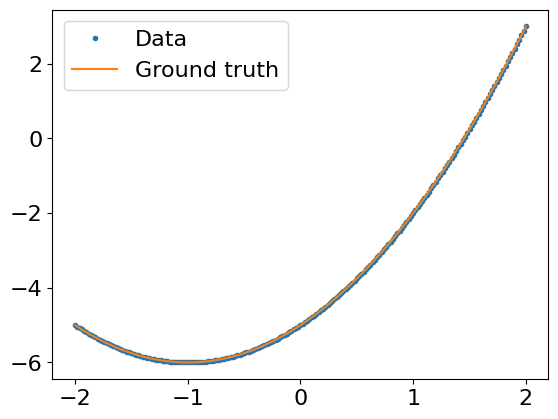

In [4]:
x = tf.linspace(-2, 2, 201)
x = tf.cast(x, tf.float32)

def f(x):
  y = x**2 + 2*x - 5
  return y

y = f(x) + 0*tf.random.normal(shape=[201])

plt.plot(x.numpy(), y.numpy(), '.', label='Data')
plt.plot(x, f(x),  label='Ground truth')
plt.legend()
x_=tf. expand_dims(x,-1)
y_=tf. expand_dims(y,-1)
print(x_)

In [8]:
class Model(tf.keras.Model):
  def __init__(self,*kwargs):
    super().__init__()

    self.history=[]
    

  def train(self,x,y):
    optimizer = tf.optimizers.Adam(learning_rate=0.001)
    print('-->training_starting')
    for step in range(2000):
      with tf.GradientTape() as g:
        error=(self.call(x)-y)**2
      mean_error=tf.reduce_mean(error)
      gradient = g.gradient(mean_error,self.trainable_weights)
      print(gradient)
      optimizer.apply_gradients(zip(gradient,self.variables))

      if step % 100 == 0:
        print(f'Iter: {step}',f'Mean squared error: {mean_error.numpy():0.6f}')
        self.history.append(mean_error)

In [1]:
input_shape = (,1)
seed=42
inputs = tfkl.Input(shape=input_shape, name='Input')
x1 = tfkl.Dense(16, activation='sigmoid', kernel_initializer = tfk.initializers.GlorotUniform(seed))(inputs)
x2 = tfkl.Dense(64, activation='sigmoid', kernel_initializer = tfk.initializers.GlorotUniform(seed))(x1)
x3 = tfkl.Dense(16, activation='sigmoid', kernel_initializer = tfk.initializers.GlorotUniform(seed))(x2)
outputs = tfkl.Dense(1, activation='linear', kernel_initializer = tfk.initializers.GlorotUniform(seed))(x3)
model = Model(inputs,outputs)

SyntaxError: invalid syntax (2022365698.py, line 1)

NotImplementedError: Exception encountered when calling layer 'model_4' (type Model).

Unimplemented `tf.keras.Model.call()`: if you intend to create a `Model` with the Functional API, please provide `inputs` and `outputs` arguments. Otherwise, subclass `Model` with an overridden `call()` method.

Call arguments received by layer 'model_4' (type Model):
  • inputs=tf.Tensor(shape=(201,), dtype=float32)
  • training=None
  • mask=None

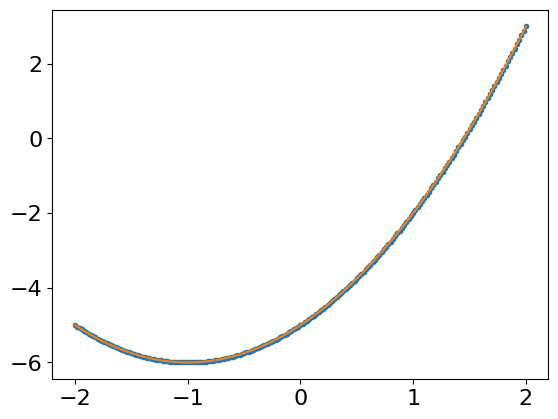

In [13]:
plt.plot(x.numpy(), y.numpy(), '.', label='data')
plt.plot(x, f(x),  label='Ground truth')
plt.plot(x, model(x), label='Untrained predictions')
plt.title('Before training')
plt.legend();

In [26]:
model.train(x_,y_)

-->training_starting
[None, None, None, None, None, None]


ValueError: No gradients provided for any variable: (['model_6/dense_18/kernel:0', 'model_6/dense_18/bias:0', 'model_6/dense_19/kernel:0', 'model_6/dense_19/bias:0', 'model_6/dense_20/kernel:0', 'model_6/dense_20/bias:0'],). Provided `grads_and_vars` is ((None, <tf.Variable 'model_6/dense_18/kernel:0' shape=(1, 16) dtype=float32, numpy=
array([[ 0.05186041, -0.00582232, -0.63340837,  0.27700055, -0.503365  ,
         1.6483268 , -1.3094703 ,  1.2054837 , -0.06513128, -1.9644321 ,
        -0.19974697,  0.9279384 , -1.2990737 , -0.22544703,  0.8460246 ,
         0.8808543 ]], dtype=float32)>), (None, <tf.Variable 'model_6/dense_18/bias:0' shape=(16,) dtype=float32, numpy=
array([ 0.61012846,  0.2973748 , -1.3536065 , -0.5009631 , -0.9577194 ,
       -0.29056028, -0.4362133 , -0.32754606, -0.650192  ,  0.02217584,
        0.05120276,  1.6108527 , -0.28549176, -1.6597089 , -1.2888651 ,
        1.8654217 ], dtype=float32)>), (None, <tf.Variable 'model_6/dense_19/kernel:0' shape=(16, 16) dtype=float32, numpy=
array([[-0.36819342, -0.3301895 ,  2.5790987 , -0.3380736 , -0.58274597,
         0.09085801, -0.8401354 , -0.20689596,  0.944795  ,  0.36082566,
         0.24596223, -0.26563072,  0.99074453,  0.11810938, -0.10264187,
         0.6899797 ],
       [ 2.4584491 , -0.04695064, -0.669974  ,  0.01062291, -1.6880265 ,
        -0.11065502,  1.9352763 , -0.08380287, -1.2240341 ,  0.9398634 ,
         2.3925323 , -0.9961189 ,  0.12065412,  0.6296675 ,  0.9873471 ,
        -0.0098377 ],
       [-0.6030085 ,  2.2049596 ,  0.8687824 , -0.8265842 ,  0.9255136 ,
        -1.3612441 ,  0.21966955,  0.8079769 ,  0.20455894, -0.62017244,
         0.9073957 , -1.5124954 , -1.844284  , -1.4554406 ,  0.38601685,
         0.42599118],
       [-0.0959782 , -2.9273899 ,  1.1627033 , -1.2540808 , -0.86405903,
         0.17078657,  0.11063947,  0.86752367,  1.690752  , -1.6326121 ,
        -0.24442449,  1.5361766 ,  0.39344144, -0.3383696 ,  0.7306308 ,
        -0.4680478 ],
       [ 0.38403177,  0.47307783, -0.15846829,  0.35437208, -0.2632275 ,
         1.3993123 , -0.9081252 , -0.2633151 ,  1.0246136 ,  0.1637172 ,
        -0.5822021 , -1.2122011 ,  0.5711831 , -0.4659929 ,  0.9800077 ,
         0.42901886],
       [ 1.0477986 ,  0.48498935,  1.8228658 ,  0.5959169 , -1.2521806 ,
         1.1893637 ,  0.84655714,  0.52821726, -0.7506163 ,  0.62934905,
         1.0571088 , -1.4255337 , -0.55661184,  0.52763766, -1.584802  ,
         0.4642252 ],
       [-1.0688473 , -0.73627514,  1.0333488 ,  0.8457986 ,  1.5936213 ,
        -0.3034908 , -0.669172  ,  0.10581411,  0.61391014,  1.0440617 ,
        -2.4918559 ,  0.14947149,  0.10581768, -0.3382714 ,  0.8651633 ,
        -1.0311469 ],
       [ 0.14153966, -0.37608865, -0.01648759,  0.70161897,  1.1693422 ,
         0.64093333, -0.861321  , -1.5362829 , -0.00736443, -0.86343354,
         0.09249299,  0.40659294, -1.2775979 ,  0.85448295,  0.9192687 ,
        -0.91743475],
       [ 1.3151555 ,  0.25424355,  0.7998638 ,  2.3232846 , -0.97055274,
        -1.1732233 , -1.0002636 ,  0.61242414,  1.3039702 , -0.43810448,
        -0.5552945 ,  0.1359714 ,  0.6012676 ,  0.5036449 ,  1.0788941 ,
        -1.0687102 ],
       [ 0.02629659, -0.9217587 ,  0.6002945 ,  0.41277078,  0.18116853,
        -1.4785278 ,  0.34327373,  0.39768097, -0.17012183,  0.773897  ,
         0.93683755, -0.50125635, -0.8387262 ,  0.4884338 , -0.94081473,
         0.5594953 ],
       [-0.66068524, -1.1500995 , -1.0046067 , -3.0806966 , -0.22502145,
        -0.18632127,  0.11318044, -1.7961378 ,  0.12428759,  0.74467325,
         0.8218651 ,  0.5555063 , -0.449202  , -0.32647353,  1.3597308 ,
         0.18067764],
       [-0.3622935 ,  0.37815773, -0.07794163, -1.1076618 ,  1.3918169 ,
         1.8714396 , -0.7674604 ,  0.474888  ,  1.4240031 ,  1.1148752 ,
         0.75738907, -0.33372575,  2.179482  , -0.4309266 , -0.9508262 ,
        -0.16530955],
       [-2.1239617 , -1.39147   ,  0.9657054 ,  1.7189972 , -0.704753  ,
         0.25897604, -0.3557488 , -0.8301892 ,  1.4158285 , -0.17392711,
         1.1448036 , -2.0641096 ,  1.1431369 ,  0.65574384,  0.22858855,
         0.8987576 ],
       [-1.3100652 , -1.0857614 ,  0.37515467,  0.16733763,  0.42478114,
         2.060982  , -1.2452826 , -2.322537  , -0.62043613, -0.29652163,
         0.98858625,  0.7294175 ,  0.66316426,  0.03055994, -0.09259254,
        -1.8061429 ],
       [ 1.5550296 , -0.7821536 ,  0.46654215,  0.30493483, -0.23416074,
        -0.38181385, -0.717378  ,  0.88512015, -1.4486227 , -0.49247584,
        -0.8201415 ,  0.19047907,  0.16409943, -0.75648105, -1.5101599 ,
         0.09695182],
       [ 1.1742103 ,  1.3278366 ,  0.4911276 , -1.1217747 ,  1.2162778 ,
        -0.6650103 ,  0.2803535 ,  0.76127124,  0.19975413, -1.5314975 ,
        -1.8552334 , -1.9056625 , -2.4337914 , -0.13594073, -0.9422175 ,
         0.88077736]], dtype=float32)>), (None, <tf.Variable 'model_6/dense_19/bias:0' shape=(16,) dtype=float32, numpy=
array([-1.1137457 , -0.565136  ,  0.13023742,  0.889987  , -0.13561966,
        1.1676251 ,  2.3054905 , -0.64380425,  0.8124165 ,  0.64482653,
        0.6404002 ,  0.39620498,  0.58729905,  2.8426795 , -1.5486912 ,
       -1.058555  ], dtype=float32)>), (None, <tf.Variable 'model_6/dense_20/kernel:0' shape=(16, 1) dtype=float32, numpy=
array([[ 0.09512071],
       [ 0.19231284],
       [-0.01619733],
       [-1.3475246 ],
       [-0.4713613 ],
       [-1.0640496 ],
       [ 0.18242462],
       [ 0.822745  ],
       [ 0.19285698],
       [-0.22297955],
       [ 1.4541426 ],
       [-0.04770102],
       [-0.25871414],
       [ 0.97200817],
       [ 0.44683546],
       [-0.03269505]], dtype=float32)>), (None, <tf.Variable 'model_6/dense_20/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>)).

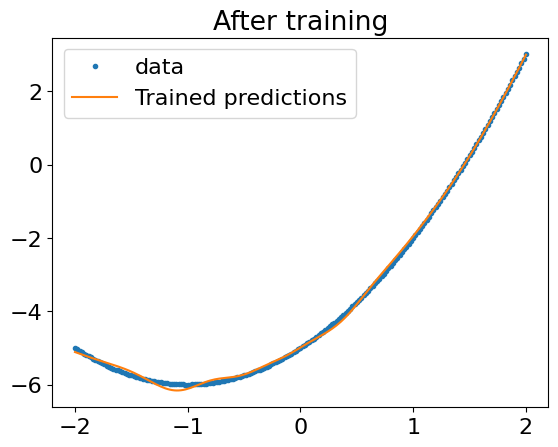

In [8]:
plt.plot(x.numpy(),y.numpy(), '.', label="data")
plt.plot(x, model(x_), label='Trained predictions')
plt.title('After training')
plt.legend();

In [55]:
x = tf.constant(5.0)
w=tf.constant(7.0)
with tf.GradientTape() as g:
  g.watch(w)
  with tf.GradientTape() as gg:
    gg.watch(x)
    y = x * x + x*w
  dy_dx = gg.gradient(y, x)  # dy_dx = 2 * x
d2y_dx2 = g.gradient(dy_dx, w)  # d2y_dx2 = 2
print(dy_dx)

print(d2y_dx2)


tf.Tensor(17.0, shape=(), dtype=float32)
tf.Tensor(1.0, shape=(), dtype=float32)
